# Data Cleaning & Analysis

## Importing the Needed Library

In [67]:
import pandas as pd
import string
import json

## Creating a DataFrame

In [50]:
df=pd.read_json('BulkResumesAll.json')
df.head()

,ID,job_title,resume,link,domain,location
0,1,Entry Data Biomedical Engineer,\n* ** *\nAbbas Nasoori\nElectrical Engineer &...,https://www.postjobfree.com/resume/adp9ec/entr...,Engineering,Canada
1,2,Biomedical Engineer Safety Officer,\nBIJAN DADOLAHI SARAB\n\n** ******** **** ***...,https://www.postjobfree.com/resume/adn6b9/biom...,Engineering,Canada
2,3,Biomedical engineer electrical engineer medica...,\nClaudia Lutfallah\nMedical Devices Customer ...,https://www.postjobfree.com/resume/adeeic/biom...,Engineering,Canada
3,4,Biomedical Engineer,"\nRIDDHI THAKKAR\n\n* ******* **. *********, *...",https://www.postjobfree.com/resume/adc4gn/biom...,Engineering,Canada
4,5,Biomedical Mechanical Engineer,\n/\nAMR\nHASSAN\nadcxpe@r.postjobfree.com\n61...,https://www.postjobfree.com/resume/adcxpe/soli...,Engineering,Canada


In [51]:
#  Converting the type of the data to string
df[['job_title', 'resume', 'domain', 'location']]=df[['job_title', 'resume', 'domain', 'location']].astype('string')

In [52]:
# Reseting the index
df.set_index(['ID'], inplace=True, drop=True)
df.head()

,job_title,resume,link,domain,location
ID,,,,,
1,Entry Data Biomedical Engineer,* ** * Abbas Nasoori Electrical Engineer & Bi...,https://www.postjobfree.com/resume/adp9ec/entr...,Engineering,Canada
2,Biomedical Engineer Safety Officer,BIJAN DADOLAHI SARAB ** ******** **** ****• ...,https://www.postjobfree.com/resume/adn6b9/biom...,Engineering,Canada
3,Biomedical engineer electrical engineer medica...,Claudia Lutfallah Medical Devices Customer Re...,https://www.postjobfree.com/resume/adeeic/biom...,Engineering,Canada
4,Biomedical Engineer,"RIDDHI THAKKAR * ******* **. *********, ****...",https://www.postjobfree.com/resume/adc4gn/biom...,Engineering,Canada
5,Biomedical Mechanical Engineer,/ AMR HASSAN adcxpe@r.postjobfree.com 613-***...,https://www.postjobfree.com/resume/adcxpe/soli...,Engineering,Canada


## Removing Special Character

In [53]:
d=df.resume.str.encode('ascii', 'ignore').str.decode('ascii')

In [54]:
df.insert(2, 'Cleaned_Resume', d)
df.head()

,job_title,resume,Cleaned_Resume,link,domain,location
ID,,,,,,
1,Entry Data Biomedical Engineer,* ** * Abbas Nasoori Electrical Engineer & Bi...,\n* ** *\nAbbas Nasoori\nElectrical Engineer &...,https://www.postjobfree.com/resume/adp9ec/entr...,Engineering,Canada
2,Biomedical Engineer Safety Officer,BIJAN DADOLAHI SARAB ** ******** **** ****• ...,\nBIJAN DADOLAHI SARAB\n\n** ******** **** ***...,https://www.postjobfree.com/resume/adn6b9/biom...,Engineering,Canada
3,Biomedical engineer electrical engineer medica...,Claudia Lutfallah Medical Devices Customer Re...,\nClaudia Lutfallah\nMedical Devices Customer ...,https://www.postjobfree.com/resume/adeeic/biom...,Engineering,Canada
4,Biomedical Engineer,"RIDDHI THAKKAR * ******* **. *********, ****...","\nRIDDHI THAKKAR\n\n* ******* **. *********, *...",https://www.postjobfree.com/resume/adc4gn/biom...,Engineering,Canada
5,Biomedical Mechanical Engineer,/ AMR HASSAN adcxpe@r.postjobfree.com 613-***...,\n/\nAMR\nHASSAN\nadcxpe@r.postjobfree.com\n61...,https://www.postjobfree.com/resume/adcxpe/soli...,Engineering,Canada


In [55]:
df['resume'].count()

9578

## Removing Duplicates

### 500 Resume were removed

In [56]:
df=df.drop_duplicates(subset=['Cleaned_Resume'])

In [57]:
df['Cleaned_Resume'].count()

9078

## Counting Resumes Based on Domains and Locations

In [58]:
df['domain'].unique()

<StringArray>
[   'Engineering',  'Entertainment', 'Administration',       'Business',
  'Communication',      'Education',        'Science',     'Technology',
       'Medicine',          'Sales',      'Marketing']
Length: 11, dtype: string

<AxesSubplot:>

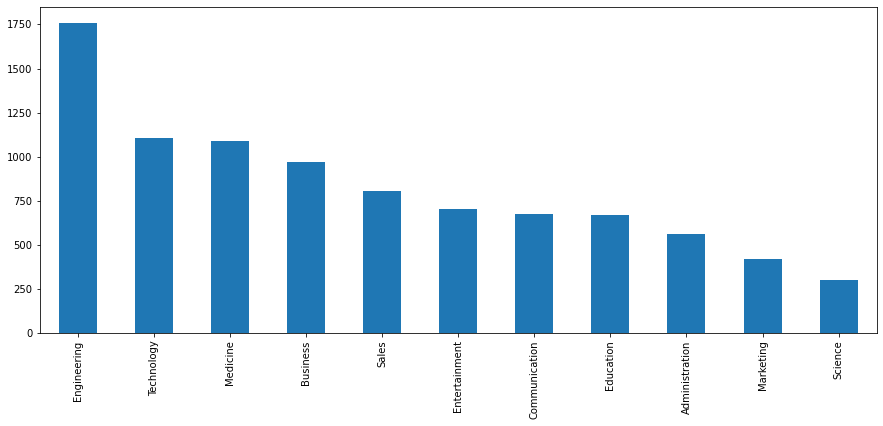

In [59]:
df_category=df['domain'].value_counts()
df_category.plot(kind='bar', figsize=(15,6))

In [60]:
df['location'].unique()

<StringArray>
['Canada', 'Egypt', 'US', 'UK', 'Australia']
Length: 5, dtype: string

<AxesSubplot:>

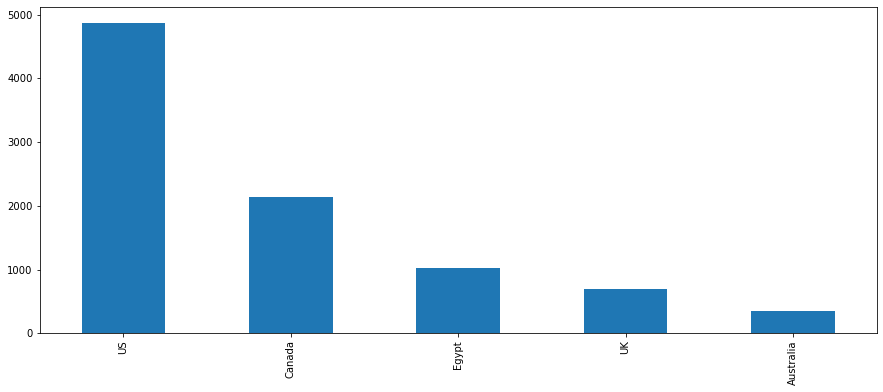

In [61]:
df_location=df['location'].value_counts()
df_location.plot(kind='bar', figsize=(15,6))

In [62]:
df_location

US           4874
Canada       2137
Egypt        1017
UK            697
Australia     353
Name: location, dtype: Int64

In [63]:
df_category

Engineering       1760
Technology        1107
Medicine          1092
Business           971
Sales              807
Entertainment      703
Communication      677
Education          672
Administration     565
Marketing          422
Science            302
Name: domain, dtype: Int64

In [65]:
df.to_csv('./BulkResumesCleaned.csv')